In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [4]:
weather = pd.read_csv('/content/drive/MyDrive/Data/weather.csv',
                      parse_dates=['datetime_utc'], index_col='datetime_utc')
weather.head()

,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
datetime_utc,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
weather = weather.drop([' _fog', ' _hail' , ' _rain', ' _snow', ' _thunder', ' _tornado', ' _windchillm', ' _wdire', ' _heatindexm'], axis=1)

In [4]:
weather.head()

,_conds,_dewptm,_hum,_precipm,_pressurem,_tempm,_vism,_wdird,_wgustm,_wspdm
datetime_utc,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,27.0,NaN,1010.0,30.0,5.0,280.0,NaN,7.4
1996-11-01 12:00:00,Smoke,10.0,32.0,NaN,-9999.0,28.0,NaN,0.0,NaN,NaN
1996-11-01 13:00:00,Smoke,11.0,44.0,NaN,-9999.0,24.0,NaN,0.0,NaN,NaN
1996-11-01 14:00:00,Smoke,10.0,41.0,NaN,1010.0,24.0,2.0,0.0,NaN,NaN
1996-11-01 16:00:00,Smoke,11.0,47.0,NaN,1011.0,23.0,1.2,0.0,NaN,0.0


In [ ]:
null_values = weather.isnull().sum()

print(null_values.to_frame('Null'))

               Null
 _conds          72
 _dewptm        621
 _hum           757
 _precipm    100990
 _pressurem     232
 _tempm         673
 _vism         4428
 _wdird       14755
 _wgustm      99918
 _wspdm        2358


In [6]:
weather = weather.drop([' _dewptm', ' _precipm', ' _vism', ' _wdird', ' _wgustm', ' _wspdm'], axis=1)

Rename column

In [7]:
weather = weather.rename(index=str, columns={' _conds': 'condition', ' _hum': 'humidity', ' _pressurem': 'pressure', ' _tempm': 'temperature'})
weather.tail()

,condition,humidity,pressure,temperature
datetime_utc,,,,
2017-04-24 06:00:00,Haze,25.0,1005.0,34.0
2017-04-24 09:00:00,Haze,16.0,1003.0,38.0
2017-04-24 12:00:00,Haze,14.0,1002.0,36.0
2017-04-24 15:00:00,Haze,27.0,1004.0,32.0
2017-04-24 18:00:00,Haze,30.0,1005.0,30.0


In [ ]:
weather.describe()

,humidity,pressure,temperature
count,100233.000000,1.007580e+05,100317.000000
mean,57.909481,1.932331e+03,25.451269
std,23.807771,3.183786e+05,8.482859
min,4.000000,-9.999000e+03,1.000000
25%,39.000000,1.002000e+03,19.000000
50%,59.000000,1.008000e+03,27.000000
75%,78.000000,1.014000e+03,32.000000
max,243.000000,1.010614e+08,90.000000


In [ ]:
weather_cor = weather.corr()
weather_cor

<ipython-input-8-c107970d31b4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_cor = weather.corr()


,humidity,pressure,temperature
humidity,1.000000,-0.005725,-0.589912
pressure,-0.005725,1.000000,0.004684
temperature,-0.589912,0.004684,1.000000


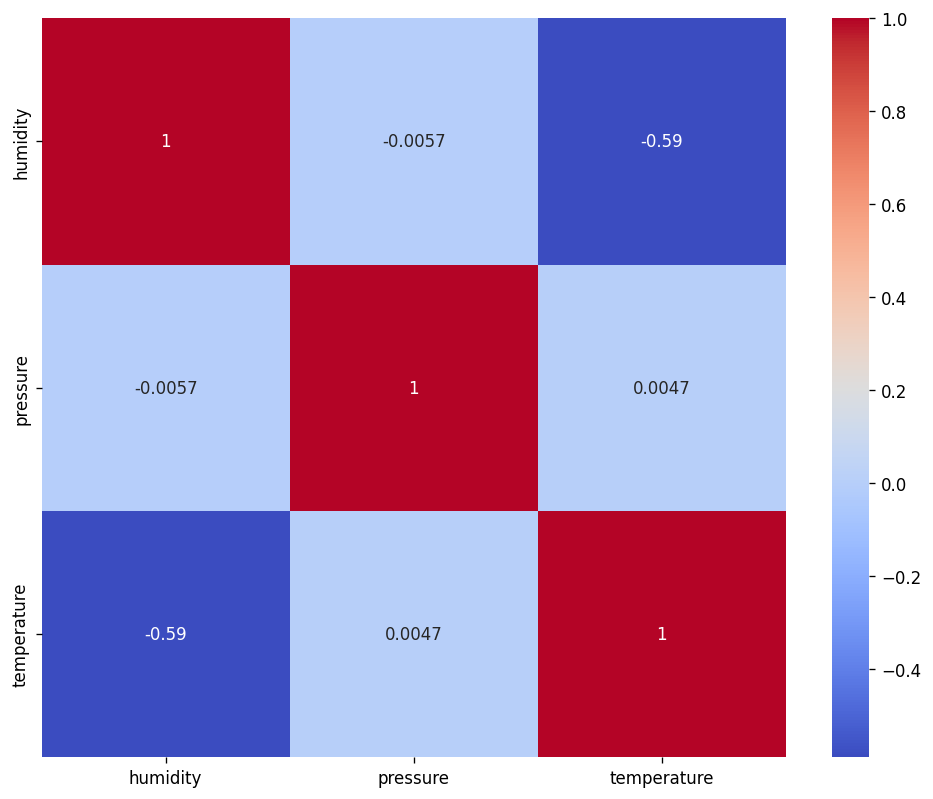

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(weather_cor, annot=True, cmap='coolwarm')

plt.show()

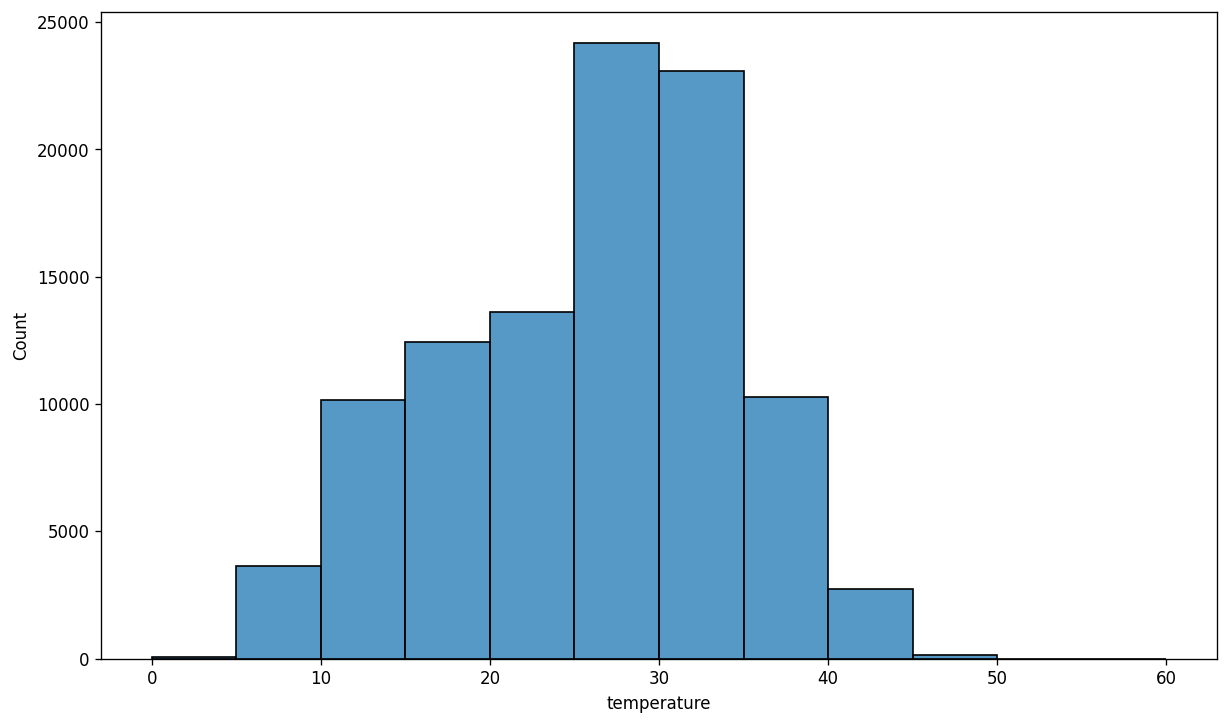

In [ ]:
#Distribution of Temperatures
plt.figure(figsize=(12, 7))
sns.histplot(weather['temperature'],bins=[i for i in range(0,61,5)], kde=False)
plt.show()

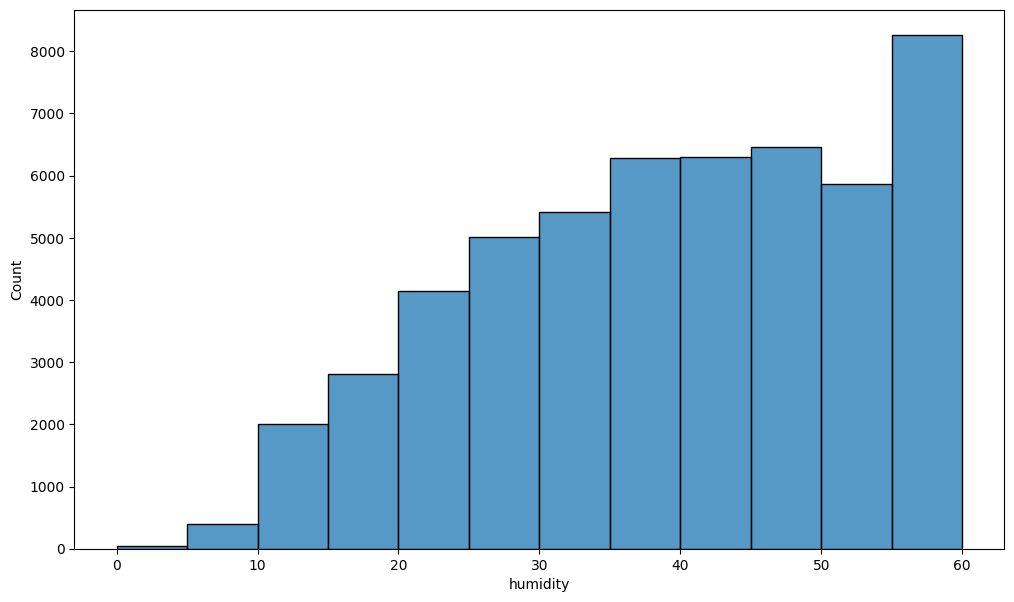

In [ ]:
#plt.title("Distribution of Humidity")
plt.figure(figsize=(12, 7))
sns.histplot(weather['humidity'],bins=[i for i in range(0,61,5)], kde=False)
plt.show()

In [8]:
weather['temperature'].fillna(weather['temperature'].mean(), inplace=True)

In [ ]:
weather.head()

,condition,humidity,pressure,temperature
datetime_utc,,,,
1996-11-01 11:00:00,Smoke,27.0,1010.0,30.0
1996-11-01 12:00:00,Smoke,32.0,-9999.0,28.0
1996-11-01 13:00:00,Smoke,44.0,-9999.0,24.0
1996-11-01 14:00:00,Smoke,41.0,1010.0,24.0
1996-11-01 16:00:00,Smoke,47.0,1011.0,23.0


In [9]:
weather = weather[weather.temperature < 50]
weather = weather[weather.humidity <= 100]

In [10]:
weather.index = pd.to_datetime(weather.index)
weather.index

DatetimeIndex(['1996-11-01 11:00:00', '1996-11-01 12:00:00',
               '1996-11-01 13:00:00', '1996-11-01 14:00:00',
               '1996-11-01 16:00:00', '1996-11-01 17:00:00',
               '1996-11-01 18:00:00', '1996-11-01 19:00:00',
               '1996-11-01 20:00:00', '1996-11-01 21:00:00',
               ...
               '2017-04-23 15:00:00', '2017-04-23 18:00:00',
               '2017-04-23 21:00:00', '2017-04-24 00:00:00',
               '2017-04-24 03:00:00', '2017-04-24 06:00:00',
               '2017-04-24 09:00:00', '2017-04-24 12:00:00',
               '2017-04-24 15:00:00', '2017-04-24 18:00:00'],
              dtype='datetime64[ns]', name='datetime_utc', length=100226, freq=None)

In [13]:
train = weather['2000':'2015'].resample('M').mean().fillna(method='pad')
train.drop(columns='humidity', axis=1, inplace=True)
train.drop(columns='pressure', axis=1, inplace=True)
test = weather['2016':'2017'].resample('M').mean().fillna(method='pad')
test.drop(columns='humidity', axis=1, inplace=True)
test.drop(columns='pressure', axis=1, inplace=True)

<ipython-input-13-ac37cb086b11>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train = weather['2000':'2015'].resample('M').mean().fillna(method='pad')
<ipython-input-13-ac37cb086b11>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  test = weather['2016':'2017'].resample('M').mean().fillna(method='pad')


<Axes: xlabel='datetime_utc'>

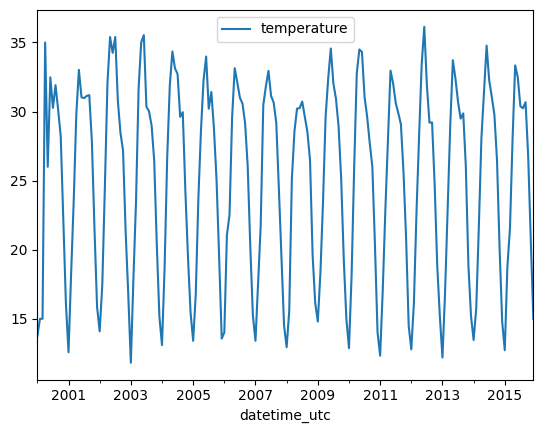

In [ ]:
train.plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(train.dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -2.108443
p-value: 0.241133


In [ ]:
from statsmodels.tsa.stattools import adfuller

result1 = adfuller(train.diff(12).dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -3.811923
p-value: 0.002788


<Axes: xlabel='datetime_utc'>

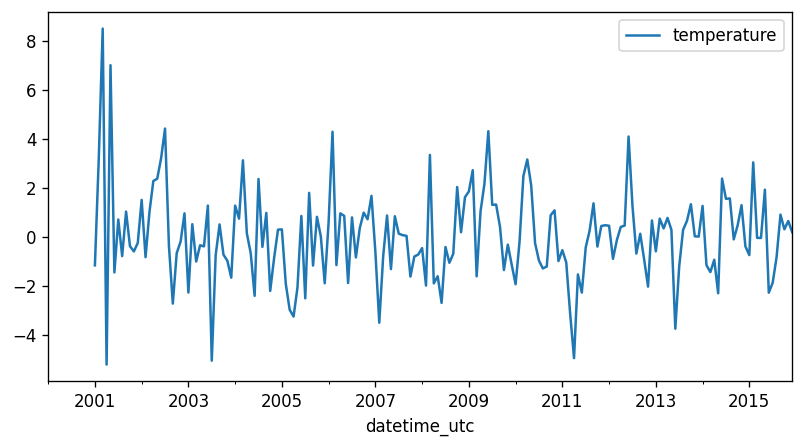

In [ ]:
train.diff(12).plot()

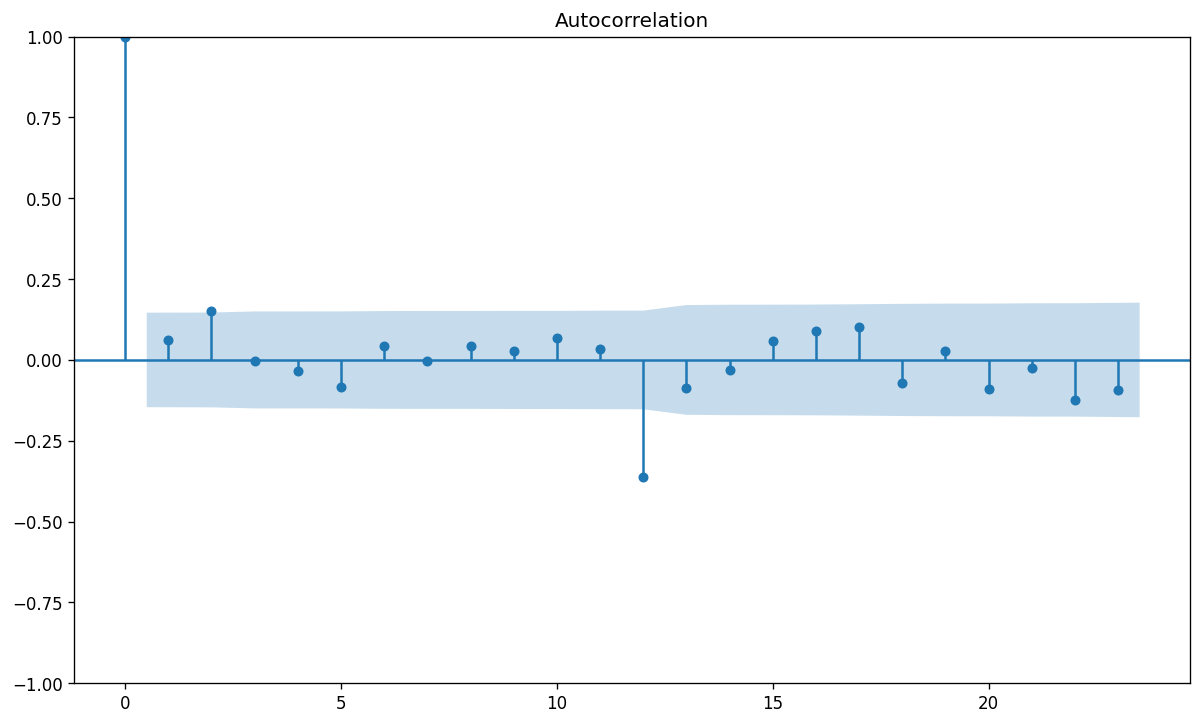

In [ ]:
# Original Series
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})

plot_acf(train.diff(12).dropna())

plt.show()

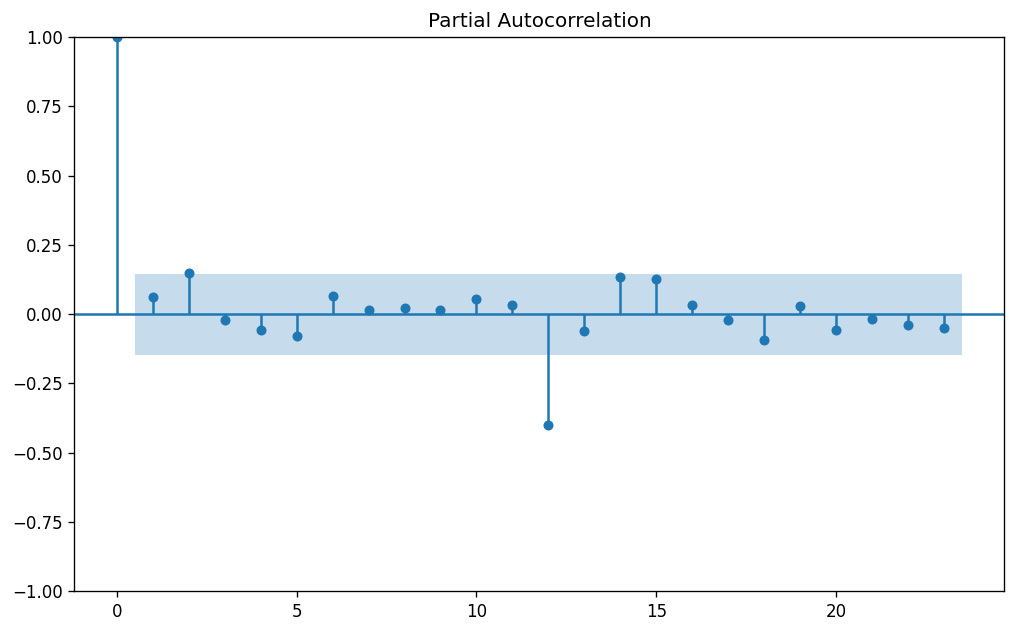

In [ ]:
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
plot_pacf(train.diff(12).dropna())
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train.diff(12).dropna(), order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                  180
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -358.349
Date:                Tue, 23 Jan 2024   AIC                            728.699
Time:                        06:55:01   BIC                            747.857
Sample:                    01-31-2001   HQIC                           736.467
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0275      0.173      0.160      0.873      -0.311       0.366
ar.L1          0.1167      0.058      2.003      0.045       0.003       0.231
ar.L2         -0.7122      0.070    -10.125      0.0

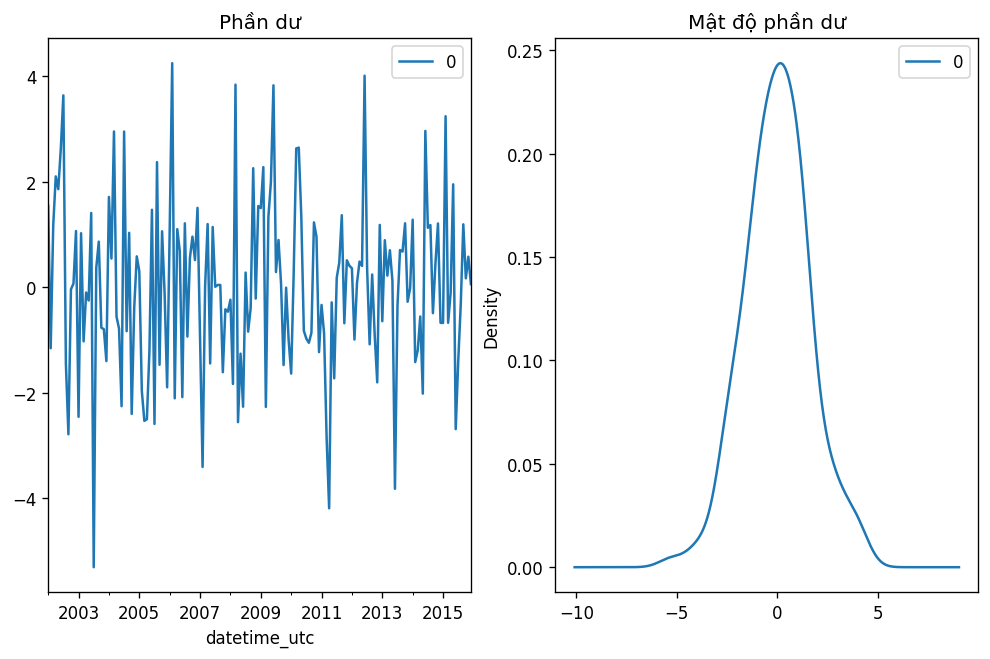

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Phần dư", ax=ax[0])
residuals.plot(kind='kde', title='Mật độ phần dư', ax=ax[1])
plt.show()

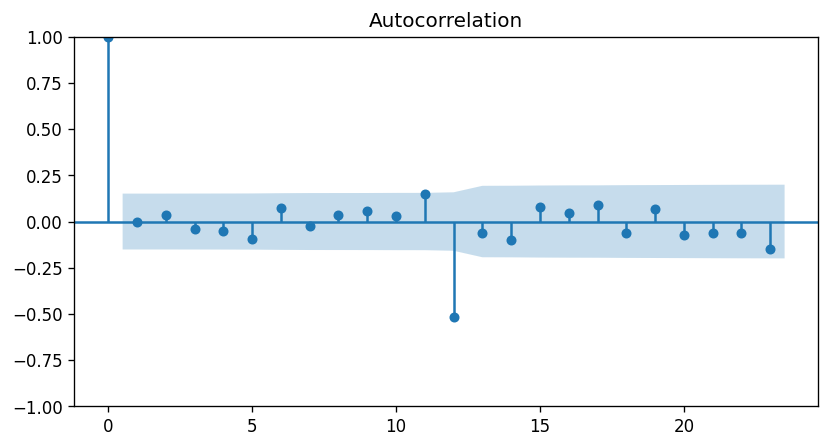

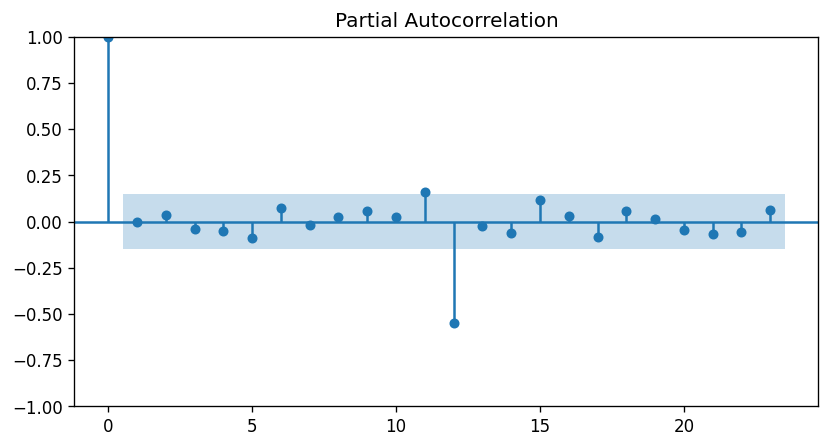

In [ ]:
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':120})
acf_res=plot_acf(residuals.dropna())
pacf_res=plot_pacf(residuals.dropna())

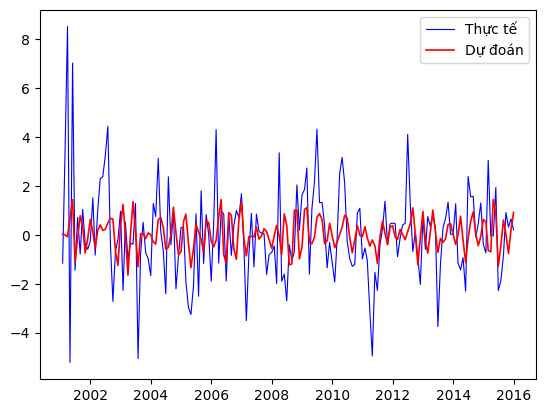

In [ ]:
# Actual vs Fitted
from matplotlib import pyplot
pyplot.plot(train.diff(12).dropna(), label='Thực tế', linewidth=0.8, color='blue')
pyplot.plot(model_fit.predict(), color='red', label='Dự đoán', linewidth=1.2)
pyplot.legend(loc='upper right')
pyplot.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predict = model_fit.predict()
train1=train.diff(12).dropna()

mse = mean_squared_error(train1, predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train1, predict)

print(f"RMSE: {rmse: .3f}", f"MAE: {mae: .3f}")

NameError: name 'model_fit' is not defined

In [ ]:
predict=model_fit.get_prediction(start=len(train), end=(len(train)+len(test)-1))

In [ ]:
predict_diff = model_fit.get_prediction(start=pd.to_datetime('2015-01-31'), end=pd.to_datetime('2015-12-31'), dynamic=False)

In [ ]:
temperature_2015=train.loc['2015']
temperature_2015.head()

,temperature
datetime_utc,
2015-01-31,12.712551
2015-02-28,18.765766
2015-03-31,21.554656
2015-04-30,28.025316
2015-05-31,33.344130


In [ ]:
predict_values=predict.predicted_mean
bounds=predict.conf_int()
bounds.head()

,lower temperature,upper temperature
2017-01-31,-3.562855,3.822568
2017-02-28,-3.726544,3.661827
2017-03-31,-3.747405,3.642787
2017-04-30,-3.635155,3.756942
2017-05-31,-3.608054,3.784682


In [ ]:
current_year_temp = weather.loc[pd.to_datetime('2015-01-31'):pd.to_datetime('2016-04-30'), 'temperature']

In [ ]:
predict_values=predict.predicted_mean
bounds=predict.conf_int()

In [ ]:
current_year_temp = train.loc[pd.to_datetime('2015-01-31'):pd.to_datetime('2015-12-31')]

# Dự đoán sự chênh lệch nhiệt độ cho năm sau
predict_diff = model_fit.get_prediction(start=pd.to_datetime('2015-01-31'), end=pd.to_datetime('2015-12-31'), dynamic=False)



In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
import itertools

warnings.filterwarnings("ignore")

# Khai báo các tham số p, d, và q
p  = d = q = range(0, 2)


# Tạo danh sách các tổ hợp tham số cho SARIMA
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]

# Duyệt qua các tổ hợp tham số và huấn luyện mô hình SARIMA
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            # Huấn luyện mô hình SARIMA (không có phần X)
            model = SARIMAX(train, order=pdq_params, seasonal_order=seasonal_params)
            result = model.fit()

            # In ra thông tin AIC của mô hình
            print(f"SARIMA({pdq_params}x{seasonal_params}) - AIC: {result.aic: .3f}")
        except:
            continue

SARIMA((0, 0, 0)x(0, 0, 0, 12)) - AIC:  1799.840
SARIMA((0, 0, 0)x(0, 0, 1, 12)) - AIC:  1584.416
SARIMA((0, 0, 0)x(0, 1, 0, 12)) - AIC:  740.439
SARIMA((0, 0, 0)x(0, 1, 1, 12)) - AIC:  693.935
SARIMA((0, 0, 0)x(1, 0, 0, 12)) - AIC:  854.337
SARIMA((0, 0, 0)x(1, 0, 1, 12)) - AIC:  808.845
SARIMA((0, 0, 0)x(1, 1, 0, 12)) - AIC:  708.834
SARIMA((0, 0, 0)x(1, 1, 1, 12)) - AIC:  695.529
SARIMA((0, 0, 1)x(0, 0, 0, 12)) - AIC:  1565.599
SARIMA((0, 0, 1)x(0, 0, 1, 12)) - AIC:  1386.546
SARIMA((0, 0, 1)x(0, 1, 0, 12)) - AIC:  741.916
SARIMA((0, 0, 1)x(0, 1, 1, 12)) - AIC:  694.329
SARIMA((0, 0, 1)x(1, 0, 0, 12)) - AIC:  854.197
SARIMA((0, 0, 1)x(1, 0, 1, 12)) - AIC:  807.076
SARIMA((0, 0, 1)x(1, 1, 0, 12)) - AIC:  709.815
SARIMA((0, 0, 1)x(1, 1, 1, 12)) - AIC:  696.208
SARIMA((0, 1, 0)x(0, 0, 0, 12)) - AIC:  1111.454
SARIMA((0, 1, 0)x(0, 0, 1, 12)) - AIC:  1020.182
SARIMA((0, 1, 0)x(0, 1, 0, 12)) - AIC:  849.829
SARIMA((0, 1, 0)x(0, 1, 1, 12)) - AIC:  793.639
SARIMA((0, 1, 0)x(1, 0, 0, 12)) - 

<Figure size 1000x800 with 0 Axes>

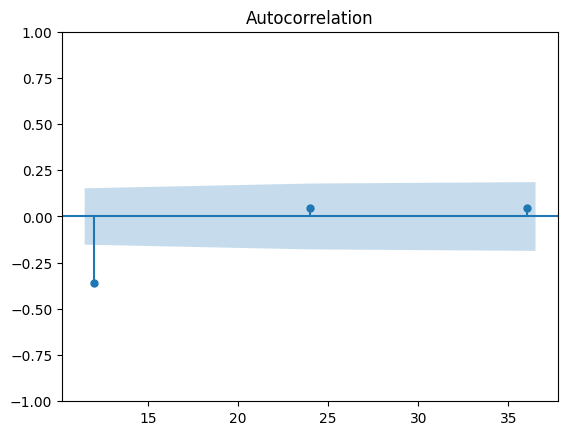

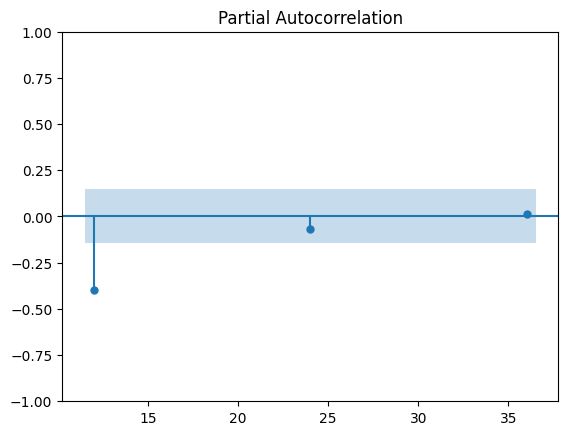

In [ ]:
plt.figure(figsize=(10,8))
lags = [12*i for i in range(1,4)]
acf = plot_acf(train.diff(12).dropna(),lags=lags)
plt.show()
pacf = plot_pacf(train.diff(12).dropna(),lags=lags)
plt.show()

In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,
              order=(1,0,1),
              seasonal_order=(0,1,1,12)
             )
model_fit=model.fit()

In [ ]:
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                        temperature   No. Observations:                  192
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -341.682
Date:                            Tue, 23 Jan 2024   AIC                            691.363
Time:                                    06:59:34   BIC                            704.135
Sample:                                01-31-2000   HQIC                           696.541
                                     - 12-31-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7229      0.210      3.444      0.001       0.311       1.134
ma.L1         -0.5865      0.231   

In [27]:
predict=model_fit.get_prediction(start=pd.to_datetime('2000-01-31'), end=pd.to_datetime('2015-12-31'), dynamic=False)
predict_values=predict.predicted_mean

In [33]:
predict_values[2001:2015]

Series([], Freq: M, Name: predicted_mean, dtype: float64)

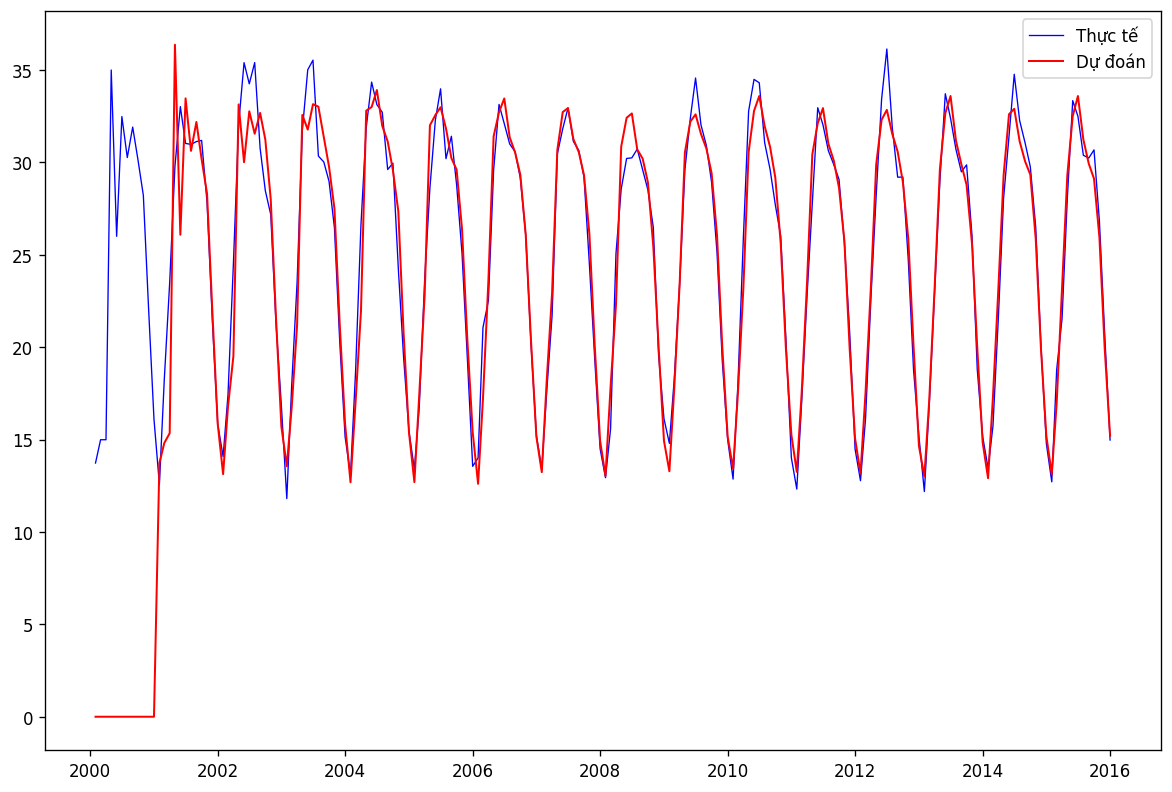

In [16]:
plt.rcParams.update({'figure.figsize':(12,8), 'figure.dpi':120})
from matplotlib import pyplot
pyplot.plot(train, label='Thực tế', linewidth=0.8, color='blue')
pyplot.plot(model_fit.predict(), color='red', label='Dự đoán', linewidth=1.2)
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

predict = model_fit.predict()

mse = mean_squared_error(train, predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train, predict)

print(f"RMSE: {rmse: .3f}", f"MAE: {mae: .3f}")

MSE:  44.367 RMSE:  6.661 MAE:  2.673


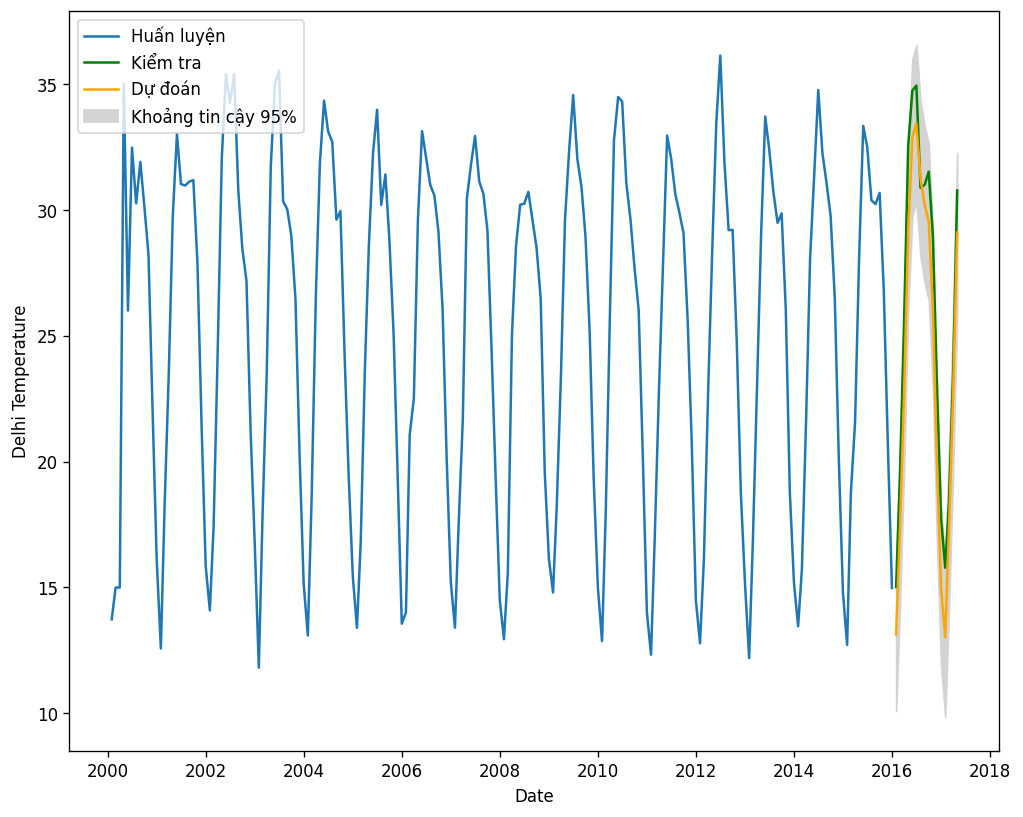

In [ ]:
forecast = model_fit.get_forecast(steps=len(test))

predictedmean = forecast.predicted_mean
bounds = forecast.conf_int()
lower_limit = bounds.iloc[:,0]
upper_limit = bounds.iloc[:,1]


plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':120})
plt.plot(train.index, train, label='Huấn luyện')
plt.plot(test.index,test,label='Kiểm tra', color='green')

plt.plot(predictedmean.index, predictedmean, color='orange', label='Dự đoán')
plt.fill_between(lower_limit.index,lower_limit,upper_limit, color='lightgray', label='Khoảng tin cậy 95%')

plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()

In [12]:
predict=model_fit.get_prediction(start=len(train), end=(len(train)+len(test)-1))

In [16]:
predict_values=predict.predicted_mean

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


mse = mean_squared_error(test, predict_values)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predict_values)

print(f"RMSE: {rmse: .3f}", f"MAE: {mae: .3f}")

RMSE:  2.185 MAE:  1.995
